## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results,on="Mouse ID",how = "inner")
# Display the data table for preview
combined_data.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids[0]

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

clean_time_complete_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_time_complete_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_df = clean_time_complete_data.drop_duplicates(subset = 'Mouse ID',keep = 'first')
unique_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_df["Mouse ID"].count()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ss_df = clean_time_complete_data
drug_group_df = ss_df.groupby("Drug Regimen")
mean_ss = drug_group_df["Tumor Volume (mm3)"].mean()
median_ss = drug_group_df["Tumor Volume (mm3)"].median()
var_ss = drug_group_df["Tumor Volume (mm3)"].var()
std_ss = drug_group_df["Tumor Volume (mm3)"].std()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
ss_drugs_merge1 = pd.merge(mean_ss,median_ss,on="Drug Regimen",how = "inner")
ss_drugs_merge1_rename = ss_drugs_merge1.rename(columns = {
    "Tumor Volume (mm3)_x":"Mean",
     "Tumor Volume (mm3)_y":"Median"
})
ss_drugs_merge2 = pd.merge(var_ss,std_ss,on="Drug Regimen",how = "inner")
ss_drugs_merge2_rename = ss_drugs_merge2.rename(columns = {
    "Tumor Volume (mm3)_x":"Variance",
     "Tumor Volume (mm3)_y":"Standard Deviation"
})
ss_drugs_regimen = pd.merge(ss_drugs_merge1_rename,ss_drugs_merge2_rename,on="Drug Regimen",how = "inner")
ss_drugs_regimen

,Mean,Median,Variance,Standard Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

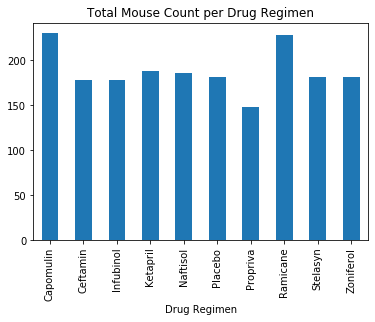

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
bardata = drug_group_df["Mouse ID"].count()
bardata.plot(y='Mouse Count', kind="bar",title = "Total Mouse Count per Drug Regimen")


Text(0, 0.5, 'Mouse Count')

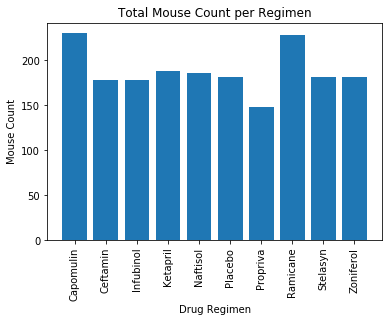

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bardata2 = bardata.reset_index()
x_axis = np.arange(1,len(bardata2["Mouse ID"])+1,1)
plt.bar(x_axis,bardata2["Mouse ID"])
xtick_locations = [value for value in x_axis]
plt.xticks(xtick_locations,bardata2["Drug Regimen"],rotation = "vertical")
plt.title("Total Mouse Count per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")

Text(0.5, 1.0, 'Mouse ID Count')

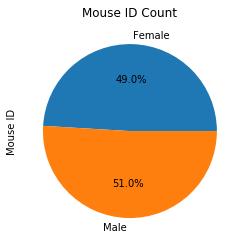

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_time_complete_data.groupby("Sex")
piedata = gender_group["Mouse ID"].count()
piedata.plot(kind='pie',autopct="%1.1f%%")
plt.title("Mouse ID Count")

Text(0, 0.5, 'Mouse ID Count')

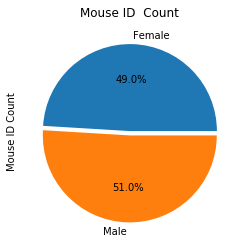

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = piedata.reset_index()
pie2
genders = pie2["Sex"]
explode = [0.0,0.05]

plt.pie(piedata,explode = explode,labels=genders,autopct="%1.1f%%")
plt.title("Mouse ID  Count")
plt.ylabel("Mouse ID Count")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
countc = 0
# Start by getting the last (greatest) timepoint for each mouse
sorted_complete_data = clean_time_complete_data.sort_values(by=["Mouse ID","Timepoint"],ascending = True)
final_tumor_vol_sorted = sorted_complete_data.drop_duplicates(subset = "Mouse ID",keep='last')

capomulin = final_tumor_vol_sorted.loc[final_tumor_vol_sorted["Drug Regimen"]=="Capomulin"]
ramicane = final_tumor_vol_sorted.loc[final_tumor_vol_sorted["Drug Regimen"]=="Ramicane"]
infubinol = final_tumor_vol_sorted.loc[final_tumor_vol_sorted["Drug Regimen"]=="Infubinol"]
ceftamin = final_tumor_vol_sorted.loc[final_tumor_vol_sorted["Drug Regimen"]=="Ceftamin"]

dropped_names_final_tumor_vol = final_tumor_vol_sorted.drop(columns = ["Drug Regimen","Sex","Age_months","Weight (g)","Metastatic Sites","Timepoint"])
rename_final_tumor_vol = dropped_names_final_tumor_vol.rename(columns= {
     "Tumor Volume (mm3)":"Final Tumor Volume"
 })
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_merge = pd.merge(clean_time_complete_data,rename_final_tumor_vol ,on="Mouse ID",how="inner")
final_tumor_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845
1876,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845
1877,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845
1878,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_merge["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_tumor_vol = capomulin["Tumor Volume (mm3)"]
ram_tumor_vol = ramicane["Tumor Volume (mm3)"]
in_tumor_vol = infubinol["Tumor Volume (mm3)"]
cef_tumor_vol = ceftamin["Tumor Volume (mm3)"]

#capomulin iqr
cap_quartiles = cap_tumor_vol.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
print(f"The lower quartile of capomulin tumor volume is: {cap_lowerq}")
print(f"The upper quartile of capomulin tumor volume is: {cap_upperq}")
print(f"The interquartile range of capomulin tumor volume is: {cap_iqr}")
print(f"The the median of capomulin tumor volume is: {cap_quartiles[0.5]} ")
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

The lower quartile of capomulin tumor volume is: 32.37735684
The upper quartile of capomulin tumor volume is: 40.1592203
The interquartile range of capomulin tumor volume is: 7.781863460000004
The the median of capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
#ramicane iqr
ram_quartiles = ram_tumor_vol.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
print(f"The lower quartile of capomulin tumor volume is: {ram_lowerq}")
print(f"The upper quartile of capomulin tumor volume is: {ram_upperq}")
print(f"The interquartile range of capomulin tumor volume is: {ram_iqr}")
print(f"The the median of capomulin tumor volume is: {ram_quartiles[0.5]} ")

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

The lower quartile of capomulin tumor volume is: 31.56046955
The upper quartile of capomulin tumor volume is: 40.65900627
The interquartile range of capomulin tumor volume is: 9.098536719999998
The the median of capomulin tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#infubolin iqr
in_quartiles = in_tumor_vol.quantile([.25,.5,.75])
in_lowerq = in_quartiles[0.25]
in_upperq = in_quartiles[0.75]
in_iqr = in_upperq-in_lowerq
print(f"The lower quartile of capomulin tumor volume is: {in_lowerq}")
print(f"The upper quartile of capomulin tumor volume is: {in_upperq}")
print(f"The interquartile range of capomulin tumor volume is: {in_iqr}")
print(f"The the median of capomulin tumor volume is: {in_quartiles[0.5]} ")

in_lower_bound = in_lowerq - (1.5*in_iqr)
in_upper_bound = in_upperq + (1.5*in_iqr)
print(f"Values below {in_lower_bound} could be outliers.")
print(f"Values above {in_upper_bound} could be outliers.")

The lower quartile of capomulin tumor volume is: 54.04860769
The upper quartile of capomulin tumor volume is: 65.52574285
The interquartile range of capomulin tumor volume is: 11.477135160000003
The the median of capomulin tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#ceftamin iqr
cef_quartiles = cef_tumor_vol.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
print(f"The lower quartile of capomulin tumor volume is: {cef_lowerq}")
print(f"The upper quartile of capomulin tumor volume is: {cef_upperq}")
print(f"The interquartile range of capomulin tumor volume is: {cef_iqr}")
print(f"The the median of capomulin tumor volume is: {cef_quartiles[0.5]} ")

cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of capomulin tumor volume is: 48.72207785
The upper quartile of capomulin tumor volume is: 64.29983003
The interquartile range of capomulin tumor volume is: 15.577752179999997
The the median of capomulin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


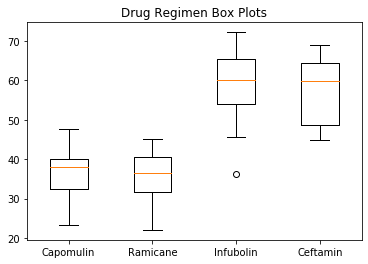

In [18]:
data_box = [cap_tumor_vol,ram_tumor_vol,in_tumor_vol,cef_tumor_vol]
fig1, ax1 = plt.subplots()
ax1.set_title("Drug Regimen Box Plots")
ax1.boxplot(data_box)
drugs = ["Capomulin","Ramicane","Infubolin","Ceftamin"]
x_axis_box = np.arange(1,len(data_box)+1,1)
ax1.set_xticks(x_axis_box)
ax1.set_xticklabels(drugs)
plt.show()


## Line and Scatter Plots

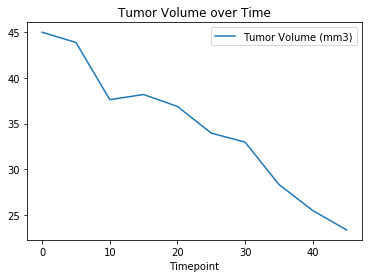

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
clean_time_complete_data.loc[clean_time_complete_data["Drug Regimen"] == "Capomulin"]
#i choose Mouse ID s185
s185 = clean_time_complete_data.loc[clean_time_complete_data["Mouse ID"] == "s185"]
s185.plot('Timepoint','Tumor Volume (mm3)',kind = "line",title = "Tumor Volume over Time")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

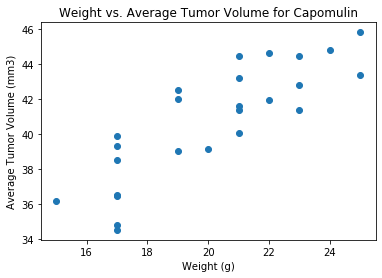

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
all_capomulin = clean_time_complete_data.loc[clean_time_complete_data["Drug Regimen"] == "Capomulin"]
group_cap_id = all_capomulin.groupby("Mouse ID")
avg_vol_cap = group_cap_id["Tumor Volume (mm3)"].mean()
weight_cap = group_cap_id["Weight (g)"].mean()
plt.scatter(weight_cap,avg_vol_cap)
plt.title("Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, inter, rval, pval, stderr) = stats.linregress(weight_cap,avg_vol_cap)
cor_co = round(st.pearsonr(weight_cap,avg_vol_cap)[0],2)
print(f"The correlation coefficient is {cor_co}")
print(f"The linear regression model formula is y = {round(slope,2)}x + {round(inter,2)}")

The correlation coefficient is 0.84
The linear regression model formula is y = 0.95x + 21.55


Text(0, 0.5, 'Average Tumor Volume (mm3)')

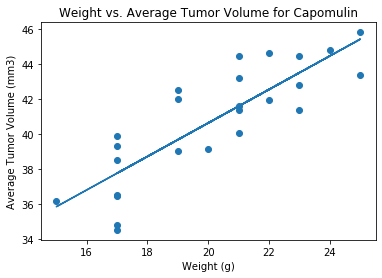

In [22]:
plt.scatter(weight_cap,avg_vol_cap)
line_val = slope*weight_cap + inter
plt.plot(weight_cap, line_val)
plt.title("Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")